In [1]:
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver  
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show

ModuleNotFoundError: No module named 'selenium'

In [2]:
import requests
from bs4 import BeautifulSoup

base_url = 'https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(base_url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
response


<Response [200]>

In [3]:
print(type(soup))
#soup

<class 'bs4.BeautifulSoup'>


In [4]:
page_number = 1

In [5]:
# Function to get the soup object for a given URL
def get_soup(url):
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.text, 'html.parser')
    else:
        return None

In [ ]:
import requests
from bs4 import BeautifulSoup

# Function to get the soup object for a given URL with headers
def get_soup(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return BeautifulSoup(response.text, 'html.parser')
    else:
        print(f"Failed to fetch page: {response.status_code}")
        return None

# Base URL for the Goodreads list
base_url = 'https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page='
page_number = 1

# Initialize lists to store the collected data
all_authors = []
all_book_titles = []
all_reviews = []
all_ratings_count = []

# Loop to navigate through pages
while True:
    # Construct the URL for the current page
    url = f"{base_url}{page_number}"
    print(f"Fetching page: {url}")

    # Get the soup object for the current page
    soup = get_soup(url)
    if not soup:
        break  # Exit loop if there was an issue fetching the page

    # Extract author names
    author_containers = soup.find_all('a', class_='authorName')
    for container in author_containers:
        author_name = container.find('span')
        if author_name:
            all_authors.append(author_name.text.strip())

    # Extract book titles
    bookTitle_containers = soup.find_all('a', class_='bookTitle')
    for container in bookTitle_containers:
        bookTitle_span = container.find('span')
        if bookTitle_span:
            all_book_titles.append(bookTitle_span.text.strip())

    # Extract reviews
    review_containers = soup.find_all('span', class_='minirating')
    for container in review_containers:
        if container:
            rating_text = container.text.strip()
            # Split the text to extract the rating part
            avg_rating = rating_text.split(' avg rating')[0]
            all_reviews.append(avg_rating)

    # Extract the number of ratings
        ratings_match = re.search(r'\d[\d,]* ratings', rating_text)
        if ratings_match:
            number_of_ratings = ratings_match.group()
            all_ratings_count.append(number_of_ratings)

    # Check for a "next page" link or button, if it doesn't exist, break the loop
    next_page = soup.find('a', class_='next_page')
    if next_page:
        if page_number == 5:
            break
        page_number += 1
    
    else:
        break

# Print the collected data
# print("Authors:")
# for author in all_authors:
#     print(author)

# print("\nBook Titles:")
# for title in all_book_titles:
#     print(title)

# print("\nReviews:")
# for review in all_reviews:
#     print(review)


Fetching page: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1


In [39]:
#goodreadsDF.to_csv("goodreads.csv", index=False)

In [ ]:
data = {
    'Book_titles': all_authors,
    'AuthorName': all_book_titles,
    'Review': all_ratings_count,
    'Ratings':all_ratings_count 
    
}

In [12]:
df = pd.DataFrame(data)

In [13]:
df['Ratings']=df['Ratings'].apply(lambda x: x.split(" ")[0].replace(',', ''))

In [14]:
df

,Book_titles,AuthorName,Review,Ratings
0,Harper Lee,To Kill a Mockingbird,"6,182,730 ratings",6182730
1,J.K. Rowling,Harry Potter and the Sorcerer’s Stone (Harry P...,"10,151,654 ratings",10151654
2,Jane Austen,Pride and Prejudice,"4,303,246 ratings",4303246
3,Anne Frank,The Diary of a Young Girl,"3,765,441 ratings",3765441
4,George Orwell,Animal Farm,"3,926,709 ratings",3926709
...,...,...,...,...
195,H.G. Wells,The Time Machine,"522,652 ratings",522652
196,Franz Kafka,The Trial,"330,248 ratings",330248
197,Alex Haley,Roots: The Saga of an American Family,"160,120 ratings",160120
198,Toni Morrison,Beloved,"439,994 ratings",439994


In [87]:

import numpy as np 
trial = df[['Review', 'Ratings']]
data = np.asarray([np.asarray(trial['Review']), np.asarray(trial['Ratings'])]).T

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

Text(0.5, 1.0, 'Elbow Curve')

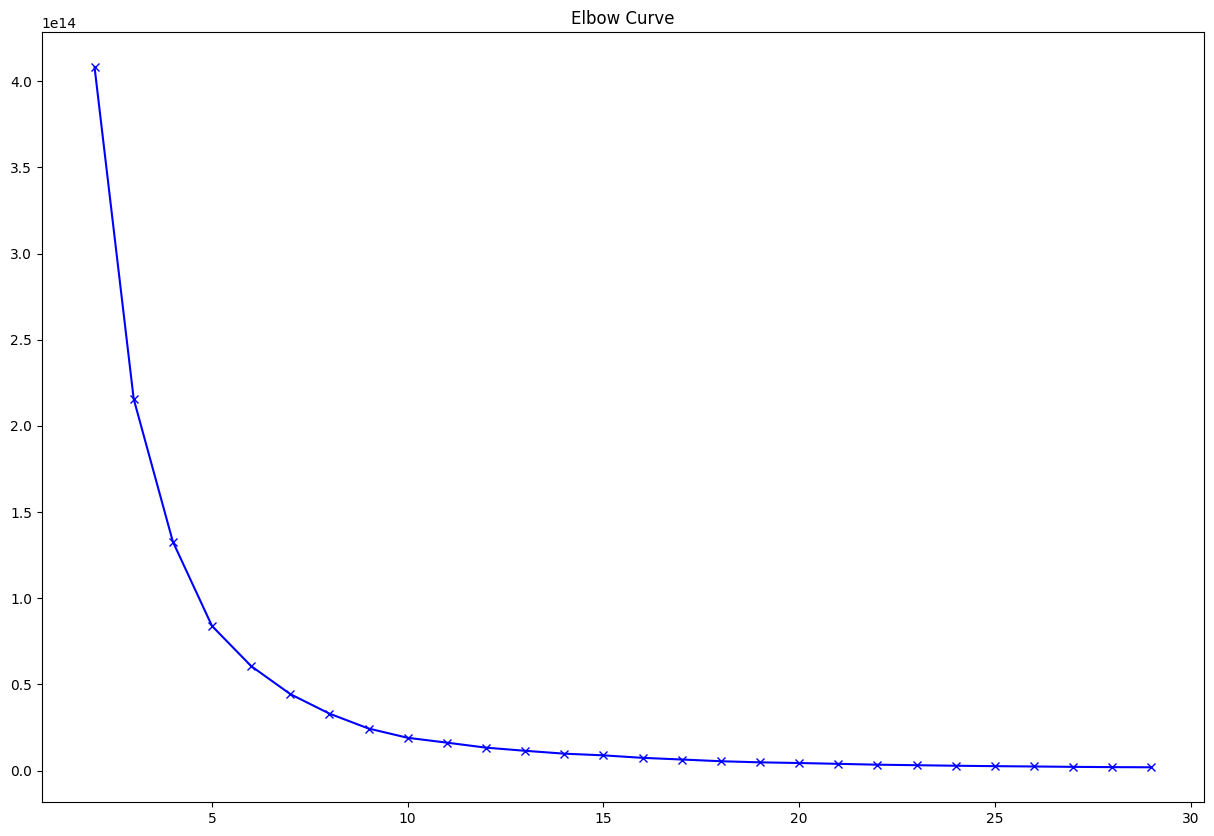

In [90]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [78]:
df.drop(df[df['Review'] == 'really liked it 4.00'].index, inplace=True)

In [83]:
df.drop(df[df['Review'] == 'it was ok 2.00'].index, inplace=True)

In [86]:
df.drop(df[df['Review'] == 'it was amazing 5.00'].index, inplace=True)

In [80]:
df[df['Review'] == 'really liked it 4.00']

,Book_titles,AuthorName,Review,Ratings
